# HW2 - ES18BTECH11016


In [1]:
# Imports
from matplotlib import pyplot as plt, image as mpimg
import numpy as np
from copy import deepcopy


## 1. Binary Morphology


### 1.1 Dilate, Erode, Median


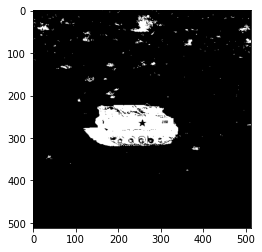

In [2]:
APC = mpimg.imread("APC.tiff")


def binarize(img: np.ndarray, threshold: int) -> np.ndarray:
    imgCopy = deepcopy(img)
    for (i, row) in enumerate(imgCopy):
        for (j, pixel) in enumerate(row):
            if pixel < threshold:
                imgCopy[i][j] = 255
            else:
                imgCopy[i][j] = 0
    return imgCopy


def complementImage(img: np.ndarray):
    imgCopy = deepcopy(img)
    for (i, row) in enumerate(imgCopy):
        for (j, _) in enumerate(row):
            imgCopy[i][j] = 255 - imgCopy[i][j]
    return imgCopy


binarizedAPC = binarize(APC, 80)
plt.imshow(binarizedAPC, cmap="gray")


#### 1.1.1 Dilate

```plaintext
 --------------
|              |
|              |
|    square    |
|              |
|              |
 --------------
      #
     ###
    #####
   ####### Cross
    #####
     ###
      #
```


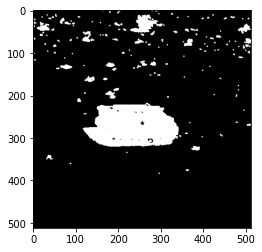

In [3]:
def DilateBinaryImage(img: list[list[int]], window, shape: str):
    window = int(
        window / 2
    )  # Given window is the side. We take the center of the window. So we need distance from the center to the edge.
    imgCopy = deepcopy(img)
    for i in range(window, img.shape[0] - window):
        for j in range(window, img.shape[1] - window):
            if img[i, j] == 0:  # If the pixel is black
                isWhite: bool = False
                if shape == "square":  # Search surrounding square for any whites
                    isWhite = img[
                        i - window : i + window + 1, j - window : j + window + 1
                    ].any()
                elif shape == "cross":  # Search surrounding cross for any whites
                    for ik in range(window):
                        for jk in range(window):
                            if (abs(ik + jk) < window) and (
                                img[i - ik, j - jk] == 255
                                or img[i + ik, j + jk] == 255
                                or img[i + ik, j - jk] == 255
                                or img[i - ik, j + jk] == 255
                            ):
                                isWhite = True
                                break
                if isWhite:
                    imgCopy[i, j] = 255  # If white is found, we dilate
                else:
                    imgCopy[i, j] = 0
    return imgCopy


plt.imshow(DilateBinaryImage(binarizedAPC, 3, "square"), cmap="gray") # Dilate Square(3)


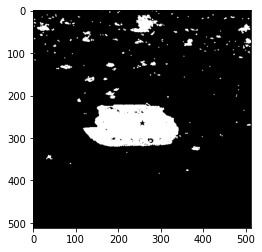

In [4]:
plt.imshow(DilateBinaryImage(binarizedAPC, 5, "cross"), cmap="gray") # Dilate Cross(5)


#### 1.1.2 Erode


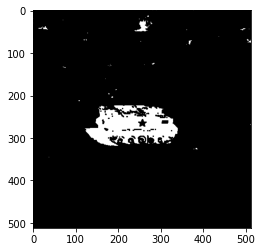

In [5]:
def ErodeBinaryImage(img: list[list[int]], window, shape: str):
    window = int(window / 2)
    imgCopy = deepcopy(img)
    for i in range(window, img.shape[0] - window):
        for j in range(window, img.shape[1] - window):
            if img[i, j] == 255:
                isBlack: bool = False
                if shape == "square":
                    isBlack = not img[
                        i - window : i + window + 1, j - window : j + window + 1
                    ].all()
                elif shape == "cross":
                    for ik in range(window):
                        for jk in range(window):
                            if (abs(ik + jk) < window) and (
                                img[i - ik, j - jk] == 0 or img[i + ik, j + jk] == 0 or img[i + ik, j - jk] == 0 or img[i - ik, j + jk] == 0
                            ):
                                isBlack = True
                                break
                if isBlack:
                    imgCopy[i, j] = 0
                else:
                    imgCopy[i, j] = 255
    return imgCopy


plt.imshow(ErodeBinaryImage(binarizedAPC, 3, "square"), cmap="gray")


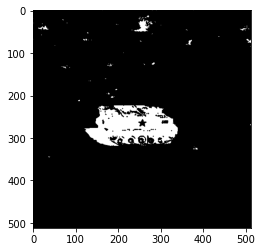

In [6]:
plt.imshow(ErodeBinaryImage(binarizedAPC, 5, "cross"), cmap="gray")


#### 1.1.3 Median


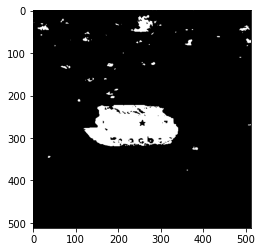

In [7]:
def MedianBinaryImage(img: list[list[int]], window, shape: str):
    window = int(window / 2)
    imgCopy = deepcopy(img)
    for i in range(window, img.shape[0] - window):
        for j in range(window, img.shape[1] - window):
            if True:
                whiteDiff = 0
                if shape == "square":
                    for ik in range(i - window, i + window + 1):
                        for jk in range(j - window, j + window + 1):
                            if img[ik, jk] == 255:
                                whiteDiff += 1
                            else:
                                whiteDiff -= 1
                elif shape == "cross":
                    for ik in range(window):
                        for jk in range(window):
                            if ik + jk < window + 1:
                                if img[i - ik, j - jk] == 0:
                                    whiteDiff -= 1
                                else:
                                    whiteDiff += 1
                                if img[i + ik, j + jk] == 0:
                                    whiteDiff -= 1
                                else:
                                    whiteDiff += 1
                                if img[i + ik, j - jk] == 0:
                                    whiteDiff -= 1
                                else:
                                    whiteDiff += 1
                                if img[i - ik, j + jk] == 0:
                                    whiteDiff -= 1
                                else:
                                    whiteDiff += 1
                if whiteDiff < 0:
                    imgCopy[i, j] = 0
                elif whiteDiff > 0:
                    imgCopy[i, j] = 255
    return imgCopy


plt.imshow(MedianBinaryImage(binarizedAPC, 3, "square"), cmap="gray")


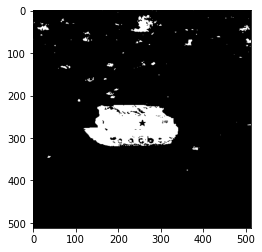

In [8]:
plt.imshow(MedianBinaryImage(binarizedAPC, 5, "cross"), cmap="gray")


### 1.2 Verify Duals


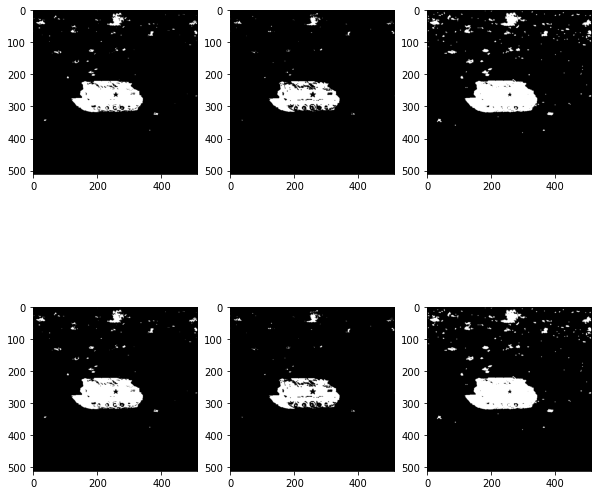

In [9]:
f, axarr = plt.subplots(2, 3, figsize=(10, 10))
axarr[0, 0].imshow(
    complementImage(MedianBinaryImage(complementImage(binarizedAPC), 5, "cross")),
    cmap="gray",
)
axarr[1, 0].imshow(MedianBinaryImage(binarizedAPC, 5, "cross"), cmap="gray")
axarr[0, 1].imshow(
    complementImage(DilateBinaryImage(complementImage(binarizedAPC), 5, "cross")),
    cmap="gray",
)
axarr[1, 1].imshow(ErodeBinaryImage(binarizedAPC, 5, "cross"), cmap="gray")
axarr[0, 2].imshow(
    complementImage(ErodeBinaryImage(complementImage(binarizedAPC), 5, "cross")),
    cmap="gray",
)
axarr[1, 2].imshow(DilateBinaryImage(binarizedAPC, 5, "cross"), cmap="gray")


In [10]:
print(
    str(complementImage(MedianBinaryImage(complementImage(binarizedAPC), 5, "cross")))
    == str(MedianBinaryImage(binarizedAPC, 5, "cross"))
)
print(
    str(complementImage(DilateBinaryImage(complementImage(binarizedAPC), 5, "cross")))
    == str(ErodeBinaryImage(binarizedAPC, 5, "cross"))
)
print(
    str(complementImage(ErodeBinaryImage(complementImage(binarizedAPC), 5, "cross")))
    == str(DilateBinaryImage(binarizedAPC, 5, "cross"))
)


True
True
True


### 1.3 Open, Close


Open = Erode + Dilate
Close = Dilate + Erode


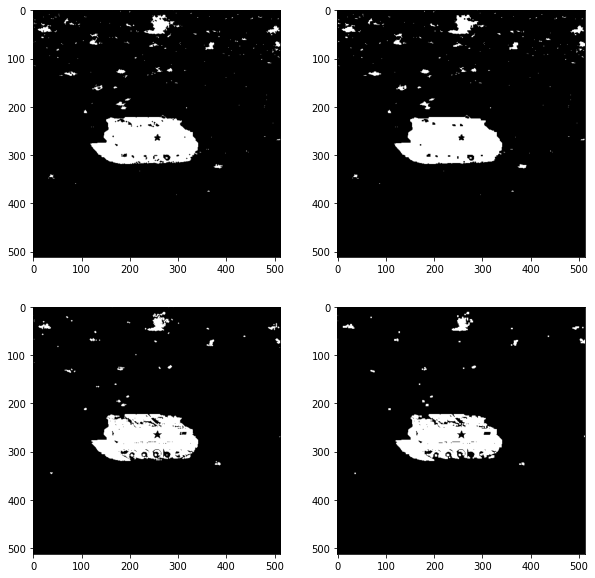

In [11]:
def OpenImage(img: list[list[int]], window: int, shape: str):
    return ErodeBinaryImage(DilateBinaryImage(img, window, shape), window, shape)


def CloseImage(img: list[list[int]], window: int, shape: str):
    return DilateBinaryImage(ErodeBinaryImage(img, window, shape), window, shape)


f, axarr = plt.subplots(2, 2, figsize=(10, 10))
axarr[0, 0].imshow(OpenImage(binarizedAPC, 5, "cross"), cmap="gray")
axarr[1, 0].imshow(CloseImage(binarizedAPC, 5, "cross"), cmap="gray")
axarr[0, 1].imshow(OpenImage(binarizedAPC, 3, "square"), cmap="gray")
axarr[1, 1].imshow(CloseImage(binarizedAPC, 3, "square"), cmap="gray")


### 1.4 Open-Clos, Clos-Open


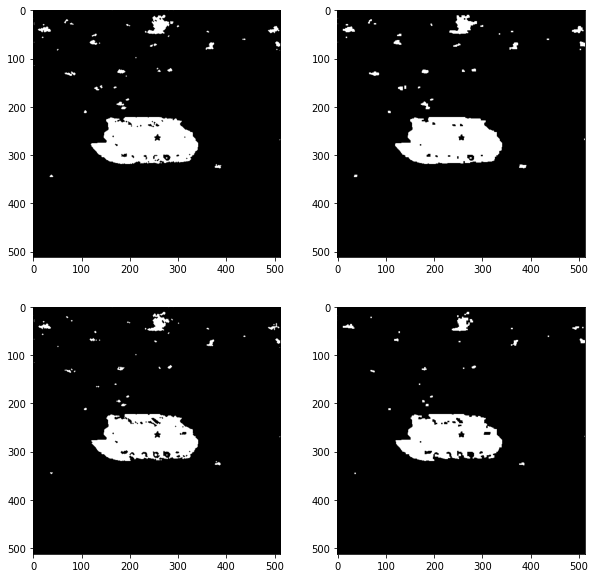

In [12]:
def OpenClosImage(img: list[list[int]], window: int, shape: str):
    return CloseImage(OpenImage(img, window, shape), window, shape)


def ClosOpenImage(img: list[list[int]], window: int, shape: str):
    return OpenImage(CloseImage(img, window, shape), window, shape)


f, axarr = plt.subplots(2, 2, figsize=(10, 10))
axarr[0, 0].imshow(OpenClosImage(binarizedAPC, 5, "cross"), cmap="gray")
axarr[1, 0].imshow(ClosOpenImage(binarizedAPC, 5, "cross"), cmap="gray")
axarr[0, 1].imshow(OpenClosImage(binarizedAPC, 3, "square"), cmap="gray")
axarr[1, 1].imshow(ClosOpenImage(binarizedAPC, 3, "square"), cmap="gray")


### 1.5 Count pixels in the object of interest in APC


In [13]:
# Get APC blob


def connectedComponents(img):
    components = []
    visited = [[False for _ in row] for row in img]
    for (i, row) in enumerate(img):
        for (j, pixel) in enumerate(row):
            if pixel == 255 and not visited[i][j]:
                component = []
                queue = [(i, j)]
                while len(queue) > 0:
                    (i, j) = queue.pop()
                    visited[i][j] = True
                    component.append((i, j))
                    if i > 0 and img[i - 1][j] == 255 and not visited[i - 1][j]:
                        queue.append((i - 1, j))
                    if (
                        i < len(img) - 1
                        and img[i + 1][j] == 255
                        and not visited[i + 1][j]
                    ):
                        queue.append((i + 1, j))
                    if j > 0 and img[i][j - 1] == 255 and not visited[i][j - 1]:
                        queue.append((i, j - 1))
                    if (
                        j < len(img[0]) - 1
                        and img[i][j + 1] == 255
                        and not visited[i][j + 1]
                    ):
                        queue.append((i, j + 1))
                components.append(component)
    return components


def maxBlob(img):
    max_size = 0
    max_component = None
    components = connectedComponents(img)
    for component in components:
        size = len(component)
        if size > max_size:
            max_size = size
            max_component = component
    return max_component


def minorBlobRemoval(img):
    r = deepcopy(img)
    for (i, row) in enumerate(img):
        for (j, _) in enumerate(row):
            r[i][j] = 0
    max_component = maxBlob(img)
    for (i, j) in max_component:
        r[i][j] = 255
    return r


bigBlobAPC = complementImage(
    minorBlobRemoval(complementImage(minorBlobRemoval(binarizedAPC)))
)


def countWhitePixels(img):
    count = 0
    for row in img:
        for pixel in row:
            if pixel == 255:
                count += 1
    return count


print(countWhitePixels(bigBlobAPC))


16524


## 3 Image Zooming


### 3.1 Nearest Neighbour Interpolation


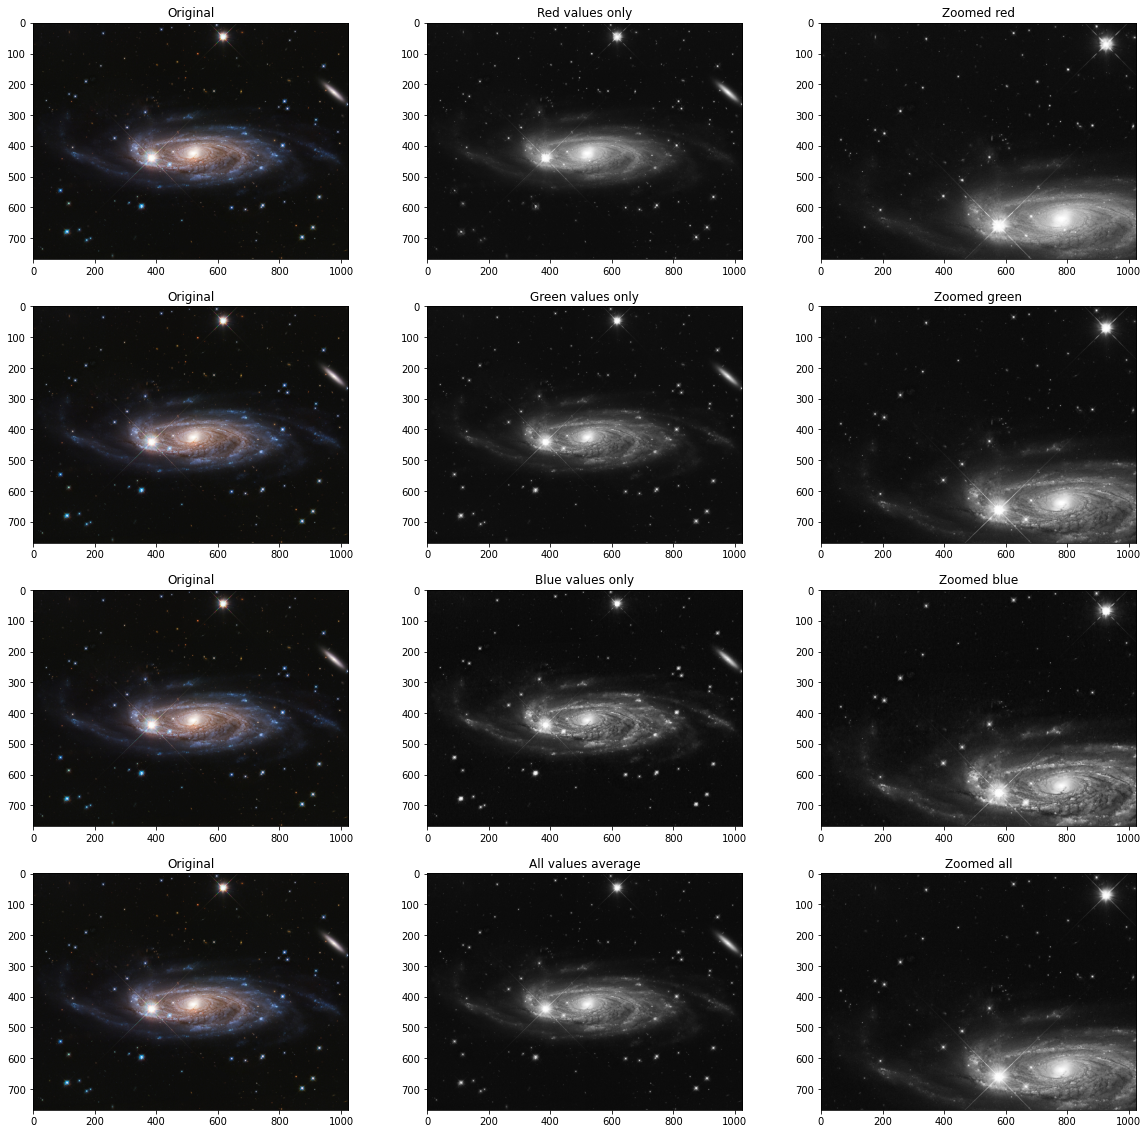

In [58]:
def colorToGray(img: list[list[(int, int, int)]], color: str):
    r = np.zeros(shape=(len(img), len(img[0])))
    for (i, row) in enumerate(r):
        for (j, _) in enumerate(row):
            if color == "red":
                r[i][j] = img[i][j][0]
            elif color == "green":
                r[i][j] = img[i][j][1]
            elif color == "blue":
                r[i][j] = img[i][j][2]
            elif color == "all":
                r[i][j] = int(img[i][j][0] / 3) + int(img[i][j][1] / 3) + int(img[i][j][2] / 3)
    return r


def ZoomImage(img: list[list[int]], zoom: float):
    r = deepcopy(img)
    for (i, row) in enumerate(img):
        for (j, pixel) in enumerate(row):
            r[i][j] = img[int(round(i / zoom))][int(round(j / zoom))]
    for (i, row) in enumerate(img):
        for (j, pixel) in enumerate(row):
            if (i * zoom) < len(r) and (j * zoom) < len(r[0]):
                r[int(i * zoom)][int(j * zoom)] = pixel
    return r


RubinsGalaxy = mpimg.imread("RubinsGalaxy_hst1024.jpg")

f, axarr = plt.subplots(4, 3, figsize=(20, 20))

axarr[0, 0].imshow(RubinsGalaxy)
axarr[0, 0].title.set_text("Original")
axarr[0, 1].imshow(colorToGray(RubinsGalaxy, "red"), cmap="gray")
axarr[0, 1].title.set_text("Red values only")
axarr[0, 2].imshow(ZoomImage(colorToGray(RubinsGalaxy, "red"), 1.5), cmap="gray")
axarr[0, 2].title.set_text("Zoomed red")

axarr[1, 0].imshow(RubinsGalaxy)
axarr[1, 0].title.set_text("Original")
axarr[1, 1].imshow(colorToGray(RubinsGalaxy, "green"), cmap="gray")
axarr[1, 1].title.set_text("Green values only")
axarr[1, 2].imshow(ZoomImage(colorToGray(RubinsGalaxy, "green"), 1.5), cmap="gray")
axarr[1, 2].title.set_text("Zoomed green")

axarr[2, 0].imshow(RubinsGalaxy)
axarr[2, 0].title.set_text("Original")
axarr[2, 1].imshow(colorToGray(RubinsGalaxy, "blue"), cmap="gray")
axarr[2, 1].title.set_text("Blue values only")
axarr[2, 2].imshow(ZoomImage(colorToGray(RubinsGalaxy, "blue"), 1.5), cmap="gray")
axarr[2, 2].title.set_text("Zoomed blue")

axarr[3, 0].imshow(RubinsGalaxy)
axarr[3, 0].title.set_text("Original")
axarr[3, 1].imshow(colorToGray(RubinsGalaxy, "all"), cmap="gray")
axarr[3, 1].title.set_text("All values average")
axarr[3, 2].imshow(ZoomImage(colorToGray(RubinsGalaxy, "all"), 1.5), cmap="gray")
axarr[3, 2].title.set_text("Zoomed all")


### 3.2 Bilinear Interpolation


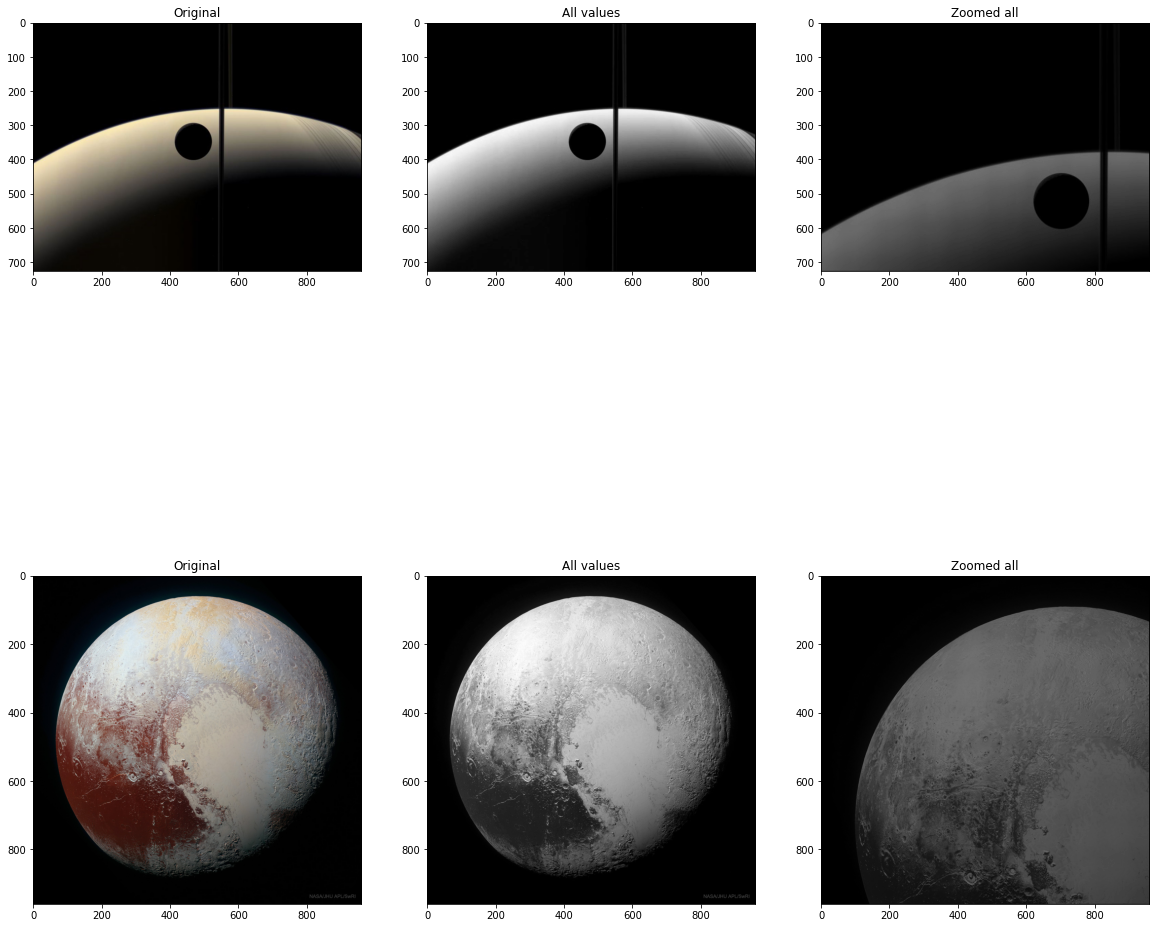

In [66]:
def BilinearInterpolationZoom(img: list[list[int]], zoom: float):
    r = deepcopy(img)
    for (i, row) in enumerate(img):
        for (j, pixel) in enumerate(row):
            r[i][j] = 0
    for (i, row) in enumerate(img):
        for (j, pixel) in enumerate(row):
            if (i * zoom) < len(r) and (j * zoom) < len(r[0]):
                r[int(i * zoom)][int(j * zoom)] = pixel
    for (ik, row) in enumerate(img):
        for (jk, pixel) in enumerate(row):
            if ik == 0 or jk == 0 or r[ik][jk] != 0:
                continue
            i = int(round(ik * zoom))
            j = int(round(jk * zoom))
            if i > len(r) - 1 or j > len(r[0]) - 1:
                continue
            mat: np.matrix = np.matrix(
                [
                    [1, i, j + 1, i * (j + 1)],
                    [1, i + 1, j, (i + 1) * j],
                    [1, i, j - 1, i * (j - 1)],
                    [1, i - 1, j, (i - 1) * j],
                ]
            )
            if np.linalg.det(mat) == 0:
                # r[i, j] = pixel
                continue
            abcd = (mat.I).dot(
                [img[i, j + 1], img[i + 1, j], img[i, j - 1], img[i - 1, j]]
            )

            r[i][j] = abcd[0] + abcd[1] * i + abcd[2] * j + abcd[3] * i * j
    return r


SaturnRHEA = mpimg.imread("saturnrhea_cassini_960.jpg")
PlutoEnhanced = mpimg.imread("PlutoEnhancedHiRes_NewHorizons_960.jpg")

f, axarr = plt.subplots(2, 3, figsize=(20, 20))

axarr[0, 0].imshow(SaturnRHEA)
axarr[0, 0].title.set_text("Original")
axarr[0, 1].imshow(colorToGray(SaturnRHEA, "all"), cmap="gray")
axarr[0, 1].title.set_text("All values")
axarr[0, 2].imshow(
    BilinearInterpolationZoom(colorToGray(SaturnRHEA, "all"), 1.5), cmap="gray"
)
axarr[0, 2].title.set_text("Zoomed all")

axarr[1, 0].imshow(PlutoEnhanced)
axarr[1, 0].title.set_text("Original")
axarr[1, 1].imshow(colorToGray(PlutoEnhanced, "all"), cmap="gray")
axarr[1, 1].title.set_text("All values")
axarr[1, 2].imshow(
    BilinearInterpolationZoom(colorToGray(PlutoEnhanced, "all"), 1.5), cmap="gray"
)
axarr[1, 2].title.set_text("Zoomed all")


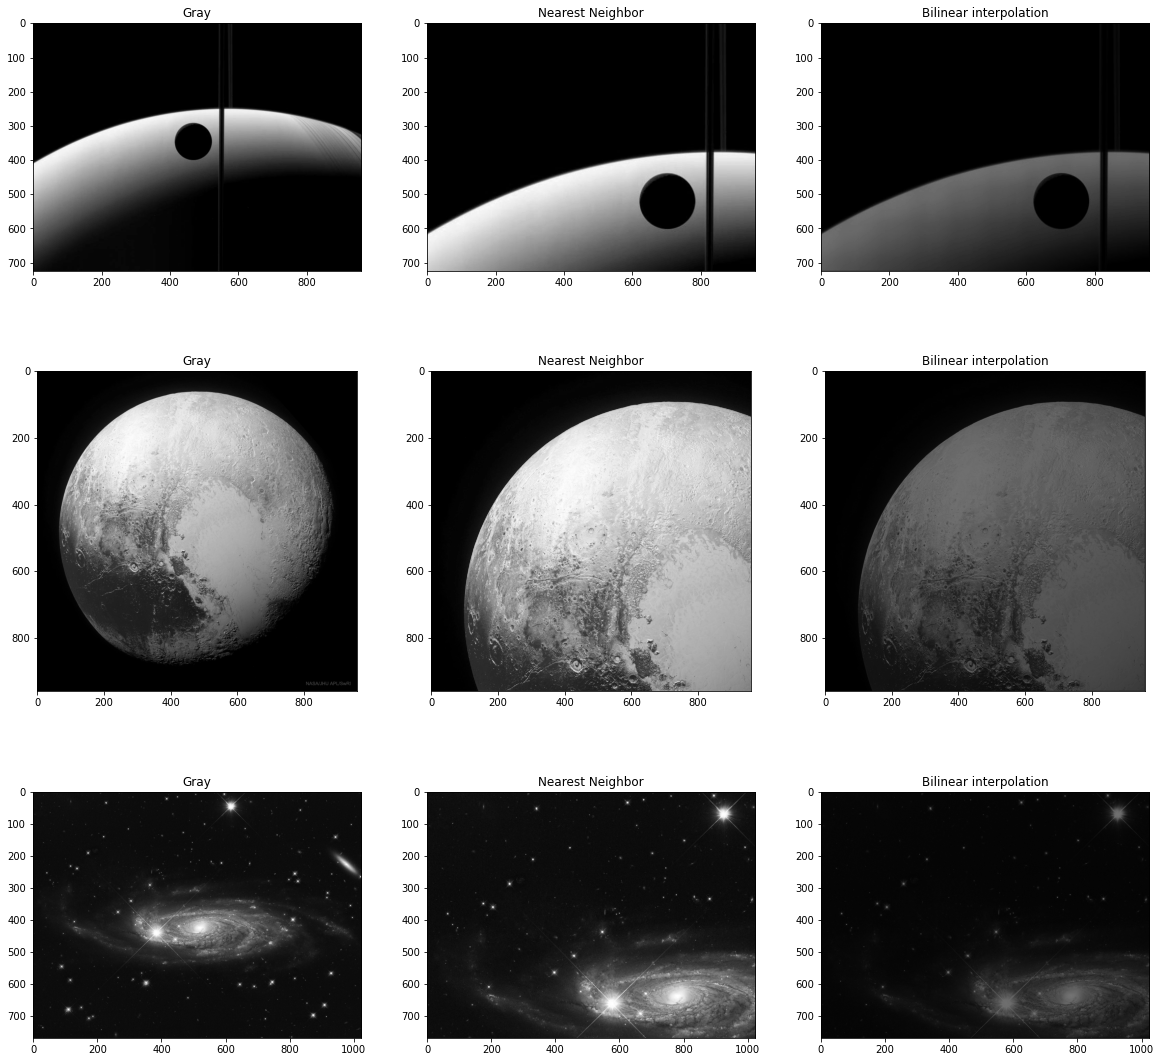

In [69]:
f, axarr = plt.subplots(3, 3, figsize=(20, 20))

axarr[0, 0].title.set_text("Gray")
axarr[0, 0].imshow(colorToGray(SaturnRHEA, "all"), cmap="gray")
axarr[0, 1].title.set_text("Nearest Neighbor")
axarr[0, 1].imshow(ZoomImage(colorToGray(SaturnRHEA, "all"), 1.5), cmap="gray")
axarr[0, 2].title.set_text("Bilinear interpolation")
axarr[0, 2].imshow(
    BilinearInterpolationZoom(colorToGray(SaturnRHEA, "all"), 1.5), cmap="gray"
)

axarr[1, 0].title.set_text("Gray")
axarr[1, 0].imshow(colorToGray(PlutoEnhanced, "all"), cmap="gray")
axarr[1, 1].title.set_text("Nearest Neighbor")
axarr[1, 1].imshow(ZoomImage(colorToGray(PlutoEnhanced, "all"), 1.5), cmap="gray")
axarr[1, 2].title.set_text("Bilinear interpolation")
axarr[1, 2].imshow(
    BilinearInterpolationZoom(colorToGray(PlutoEnhanced, "all"), 1.5), cmap="gray"
)

axarr[2, 0].title.set_text("Gray")
axarr[2, 0].imshow(colorToGray(RubinsGalaxy, "all"), cmap="gray")
axarr[2, 1].title.set_text("Nearest Neighbor")
axarr[2, 1].imshow(ZoomImage(colorToGray(RubinsGalaxy, "all"), 1.5), cmap="gray")
axarr[2, 2].title.set_text("Bilinear interpolation")
axarr[2, 2].imshow(
    BilinearInterpolationZoom(colorToGray(RubinsGalaxy, "all"), 1.5), cmap="gray"
)